In [229]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import re
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [231]:
df=pd.read_csv('../csv-data/spam1.csv')
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [232]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ? b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


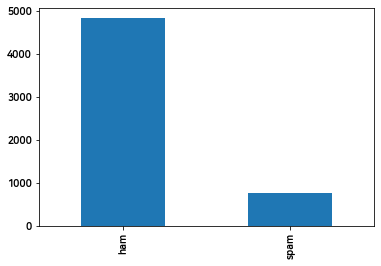

In [234]:
df['v1'].value_counts().plot(kind='bar')

In [235]:
#라벨인코딩
encoder=LabelEncoder()
df['v1'].unique()
encoder.fit(df['v1'].unique())
target=encoder.transform(df['v1'])

df['v1']= target
df['v1']


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int32

In [236]:
df #0이 ham, 1이 spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ? b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [237]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df = 3, max_df = 0.9, lowercase=True, stop_words='english')
tfidf

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), stop_words='english')

In [238]:
#testdata traindata나누기
train=df[:5000]
test=df[5000:]
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [239]:
X_train.head()
y_train.head()

1978    0
3989    1
3935    0
4078    0
4086    1
Name: v1, dtype: int32

In [240]:
X_test.head()

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either 鶯500 of CD g...
Name: v2, dtype: object

In [241]:
tfidf.fit(X_train)

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), stop_words='english')

In [242]:
train_tfidf_df = tfidf.transform(X_train)
train_tfidf_df

<4457x3636 sparse matrix of type '<class 'numpy.float64'>'
	with 34975 stored elements in Compressed Sparse Row format>

In [243]:
test_tfidf_df = tfidf.transform(X_test)
test_tfidf_df

<1115x3636 sparse matrix of type '<class 'numpy.float64'>'
	with 7811 stored elements in Compressed Sparse Row format>

In [244]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

In [245]:
SA_lr.fit(train_tfidf_df, y_train)

LogisticRegression(random_state=0)

In [246]:
test_predict = SA_lr.predict(test_tfidf_df)

In [247]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(y_test, test_predict), 3))

감성 분석 정확도 :  0.965


In [248]:
import pickle
import joblib

In [249]:
saved_model = pickle.dumps(SA_lr)

In [250]:
lr_from_pickle = pickle.loads(saved_model)

In [251]:
lr_from_pickle.predict(tfidf.transform(["WINNER!! I HAVE A DATE ON SUNDAY WITH WILL!! Free~~"]))

array([0])

In [252]:
joblib.dump(SA_lr, 'spam_ham_lr.pkl')

['spam_ham_lr.pkl']

In [253]:
lr_from_joblib = joblib.load('spam_ham_lr.pkl')
lr_from_joblib

LogisticRegression(random_state=0)

-----------------------------------------------------------------------------------------